In [3]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
# Load and preprocess the mnist dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255  # Fix: Change the last dimension to 1

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
# Build the neural network model


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))



In [12]:
# Compile the model

model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Train the model

history = model.fit(train_images,train_labels,epochs=5,batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 46s 60ms/step - loss: 0.2156 - accuracy: 0.9320 - val_loss: 0.0777 - val_accuracy: 0.9776
Epoch 2/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0579 - accuracy: 0.9818 - val_loss: 0.0516 - val_accuracy: 0.9853
Epoch 3/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0412 - accuracy: 0.9865 - val_loss: 0.0430 - val_accuracy: 0.9877
Epoch 4/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.0433 - val_accuracy: 0.9882
Epoch 5/5
750/750 [==============================] - 42s 55ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0415 - val_accuracy: 0.9887


In [13]:
# Evaluate the model on the test set

test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'test Accuracy:{test_acc}')


313/313 [==============================] - 3s 9ms/step - loss: 0.0322 - accuracy: 0.9894
test Accuracy:0.9894000291824341


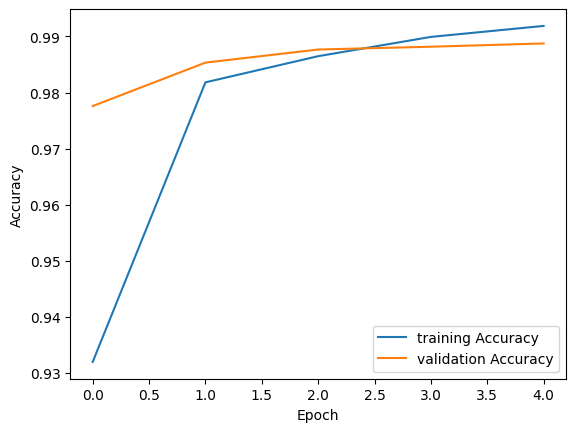

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Visualize the training history

plt.plot(history.history['accuracy'],label='training Accuracy')
plt.plot(history.history['val_accuracy'],label='validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# save the model
model.save("digit_recognition_model.h5")

In [15]:
from tensorflow.keras.models import load_model
model = load_model('digit_recognition_model.h5')

def preprocess_image(image_path):
  img= image.load_img(image_path,target_size=(28,28),color_mode='grayscale')
  img_array =image.img_to_array(img)
  img_array =np.expand_dims(img_array,axis=0)
  img_array /= 255.0
  return img_array

1/1 [==============================] - 0s 22ms/step


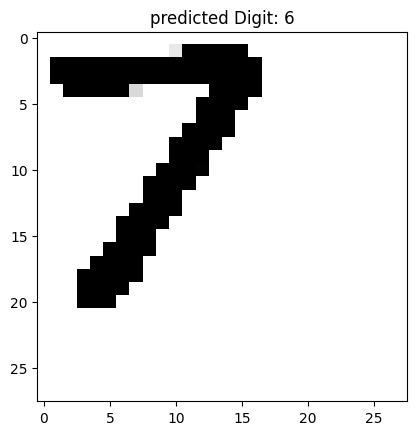

In [30]:
from keras.preprocessing import image
import numpy as np
def predict_digit(image_path):

  #preprocess the image
  img_array = preprocess_image(image_path)

  #Make a prediction

  predictions=model.predict(img_array)

  #Get the predicted digit

  predicted_digit = np.argmax(predictions)

  #Display the image

  img= image.load_img(image_path,target_size=(28,28),color_mode='grayscale')
  plt.imshow (img,cmap="gray")
  plt.title(f'predicted Digit: {predicted_digit}')
  plt.show()



  #copypath the image

image_path ="/content/imag.png"
predict_digit(image_path)